In [1]:
from netCDF4 import Dataset as NetCDFFile # extract the nc4 file to get geography data
import matplotlib.pyplot as plt
import numpy as np
import os
#search for specific base file: find `conda info --base` -name epsg
os.environ["PROJ_LIB"] ='/opt/anaconda3/pkgs/proj4-5.2.0-h0a44026_1/share/proj/'
from mpl_toolkits.basemap import Basemap #ploting the US map; install by `conda install -c anaconda basemap`

#3d plots on base map
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.animation as animation

In [2]:
geography_file = NetCDFFile("GRACEDADM_CLSM0125US_7D.A20210628.030.nc4")

In [3]:
lat = geography_file.variables['lat'][:]
lon = geography_file.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
time = geography_file.variables['time'][:]
gws_inst = geography_file.variables['gws_inst'][:] # Groundwater Percentile
rtzsm_inst = geography_file.variables["rtzsm_inst"][:] # Root Zone Soil Moisture Percentile
sfsm_inst = geography_file.variables["sfsm_inst"][:] #Surface Soil Moisture Percentile

In [4]:
ori_shape = gws_inst.shape
gws_1d = gws_inst.data[0].flatten()
above_zero = np.where((gws_1d>80) & (gws_1d<95))
gws_1d = gws_1d[above_zero]
x = lon.flatten()[above_zero]
y = lat.flatten()[above_zero]
#gws_2d = gws_1d[above_zero].reshape(ori_)

In [5]:
gws_zero_out = np.where(gws_inst.data[0]<0, 0, gws_inst.data[0])

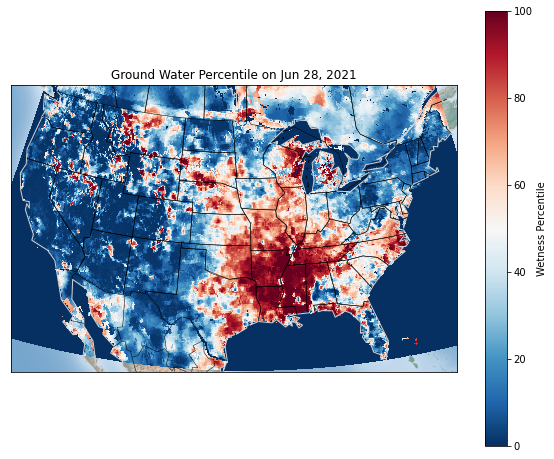

In [6]:
fig = plt.figure(figsize=(10, 8))

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.shadedrelief(scale=0.5)
#map.pcolormesh(lon, lat, rtzsm_inst, latlon=True, cmap='RdBu_r')
map.pcolormesh(lon, lat, gws_zero_out, latlon=True, cmap='RdBu_r')
#plt.clim(-8, 8)
map.drawcoastlines(color='lightgray')
map.drawstates()
map.drawcountries()
plt.title('Ground Water Percentile on Jun 28, 2021')
plt.colorbar(label='Wetness Percentile')

NameError: name '_x' is not defined

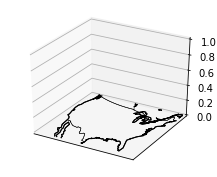

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
#ax1 = fig.add_subplot(121, projection='3d')
#ax2 = fig.add_subplot(122, projection='3d')

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95, fix_aspect=False)

#fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(121, projection='3d')
ax.add_collection3d(map.drawcoastlines())
ax.add_collection3d(map.drawcountries())
#_x = np.arange(4)
#_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
#x, y = _xx.ravel(), _yy.ravel()


#top = x + y
top = gws_1d
bottom = np.zeros_like(top)
width = depth = 1

ax.bar3d(x, y, bottom, width, depth, top, shade=True)
ax.set_title('Ground water soil moister map')

#ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
#ax2.set_title('Not Shaded')

plt.show()